<a href="https://colab.research.google.com/github/Byeon-MJ/TIL/blob/main/%5BDL%5D%20Tensor_AutoGrad_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch

# Tensor

* 행렬 계산이 많은 딥러닝의 특성으로 인해 파이토치의 자료구조는 기존 파이썬의 자료구조와 다르다. => Tensor
* Tensor는 파이토치에서 다양한 수식을 계산하는 데 사용하는 가장 기본적인 자료구조이다.
* 벡터와 행렬을 일반화한 개념으로, 특정 모양의 숫자 배열 형태로 이루어진다.
* Rank는 텐서에서 차원의 개념
    * 랭크 0 텐서 : 숫자가 하나인 `Scalar` ( `1 / 모양 : []` )
    * 랭크 1 텐서 : 일렬로 숫자를 나열한 `Vector` ( `[1, 2, 3] / 모양 : [3]` )
    * 랭크 2 텐서 : 2차원 `Matrix` ( `[[1,2,3]] / 모양 : [1,3]` )
    * 랭크 3 텐서 : 3차원 배열 ( `[[[1,2,3]]] / 모양 : [1,1,3]` )

```
([[1, 2, 3],
  [4, 5, 6],
  [7, 8, 9]])
```
* 랭크 2 텐서, 2차원 행렬
* 행 3개, 열 3개


In [10]:
# 가로와 세로 2차원으로만 이뤄진 랭크 2 텐서
# torch.tensor() -> 텐서를 만들어주는 생성자
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [11]:
# 가로, 세로 모양이 같아야 함
try:
    y = torch.tensor([[1, 2, 3, 9], [4, 5, 6], [7, 8, 9]])
except Exception as e:
    print(type(e))
    print(e)

<class 'ValueError'>
expected sequence of length 4 at dim 1 (got 3)


In [12]:
# 텐서의 구체적인 형태 = 모든 차원의 원소 개수
print(f"size : {x.size()}") # tensor.size() : 텐서의 크기(모양)
print(f"shape : {x.shape}") # tensor.shape = tensor.size()
# 텐서의 랭크/차원
print(f"랭크(차원) : {x.ndimension()}") # tenosr.ndimension() -> 랭크의 차원값

size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [13]:
# tensor.view(모양) : 직접 텐서의 모양 바꾸기
x = x.view(9) # 랭크 2 (가로, 세로, 배열...) [3, 3] → 랭크 1 [9]
print(x)
print(f"size : {x.size()}")
print(f"shape : {x.shape}")
print(f"랭크(차원) : {x.ndimension()}")

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
size : torch.Size([9])
shape : torch.Size([9])
랭크(차원) : 1


In [14]:
y = x.view((3, 3)) # 튜플이나 리스트로 원하는 모양을 넣으면 해당 모양으로 바꿔줌
# 단 전체 원소 수 크기의 약수로 구성하고, 곱하기 한 결과가 전체 원소 수를 넘으면 안됨
print(y)
print(f"size : {y.size()}")
print(f"shape : {y.shape}")
print(f"랭크(차원) : {y.ndimension()}")

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
size : torch.Size([3, 3])
shape : torch.Size([3, 3])
랭크(차원) : 2


In [15]:
try:
    x.view((2, 4)) # 9개를 2x4로 표현?
except Exception as e:
    print(type(e))
    print(e)

<class 'RuntimeError'>
shape '[2, 4]' is invalid for input of size 9


# Autograd
* Auto + gradient
* PyTorch의 Autograd 기능을 통해 **수식의 기울기**를 자동으로 계산

**Distance**
* 데이터에 대한 정답과 모델이 예측한 결과의 차이를 산술적으로 표현한 것
* 한 개(행) 씩의 데이터

**Loss(Error)**
* 학습한 데이터로 계산한 거리들의 평균
* 오차가 작은 모델일 수록 주어진 데이터에 대해 더 정확한 답을 낸다고 볼 수 있음

**Gradient Descent**
* 오차를 줄이고(개선하는) 알고리즘 중에 가장 유명하고 많이 쓰이는 알고리즘
* 오차를 <mark>수학 함수로 표현</mark>한 후, 미분하여 (→기울기) 이 함수의 기울기를 구해서 오차의 최솟값이 있는 방향을 찾아내는 알고리즘
* 경사하강법 → 함수가 수정 → 기울기 → 오차가 최소화하는 지점으로 변동

$l = a^2 = (3w)^2 = 9w^2$

In [16]:
# 값이 1인 스칼라 텐서 w (weight 가중치)
# requires_grad=True : 해당 토치에 대해 미분값을 계산해서 자동으로 .grad 속성에 저장
w = torch.tensor(1.0, requires_grad=True)

In [17]:
a = w * 3

In [18]:
l = a ** 2

In [19]:
# l을 w로 미분하기 위해 연쇄 법칙 (chain rule) 이용
l.backward() # 미분 시키기
print(f'l을 w로 미분하여 나온 기울기 값은 {w.grad}') # 9 x 2 = 18

l을 w로 미분하여 나온 기울기 값은 18.0


# 경사하강법
* 머신러닝 모델이 학습 = 모델이 출력한 결과값과 정답의 차이, 즉 **오차가 최소화된다**는 뜻
* 파이토치의 Autograd 기능을 이용하여 오차를 출력하는 함수의 기울기(미분값)에 해당하는 값을 찾을 수 있음
* 랜덤 텐서를 미분값의 반대 방향으로 조금씩 이동하면서 모델을 최적화 = 경사하강법 알고리즘

학습률 `learning rate`
* 경사하강법은 여러 번 반복해서 이뤄짐
* 이때 한 반복에서 최솟점으로 얼마나 많이 이동하는지, 즉 학습을 얼마나 급하게 진행하는지를 정하는 매개변수 = 학습률
* 학습률이 너무 크면 오차 함수(손실 함수)의 최솟점을 찾지 못하고 지나치게 되고, 값이 너무 작으면 학습 속도가 느려짐

## 경사하강법으로 사인 함수 예측
**딥러닝 문제 해결 방식**
모델 정의 -> [모델 순전파 (입력->출력) -> 오차 계산 -> 오차 역전파 (가중치 업데이트)] -> 원하는 만큼 반복 -> 오차 최소화 -> 학습 종료 -> 모델 사용

In [20]:
import torch
import matplotlib.pyplot as plt
import math

In [22]:
# 사인 함수 모양 예측
x = torch.linspace(-math.pi, math.pi, 1000)

In [23]:
# 실제 사인 곡선 y
y = torch.sin(x)    # x값에 대응되는 사인함수 결과값

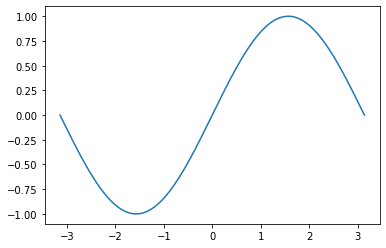

In [24]:
plt.plot(x, y)
plt.show()

$ax^3 + bx^2 + cx + d$<br>
임의의 가중치(계수)를 뽑아서 예측 사인 곡선 => y 만들기

In [25]:
torch.manual_seed(500)
a, b, c, d = torch.randn(4)
y_random = a * x**3 + b * x**2 + c * x + d

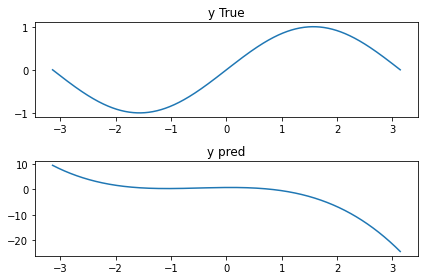

In [26]:
# 사인곡선 비교
plt.subplot(2, 1, 1)
plt.title('y True')
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title('y pred')
plt.plot(x, y_random)

plt.tight_layout()
plt.show()

## 학습을 통해 가중치 적용

epoch(0) loss : 54985.25


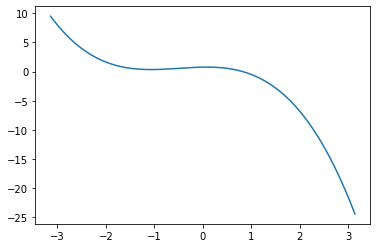

epoch(200) loss : 388.61749267578125


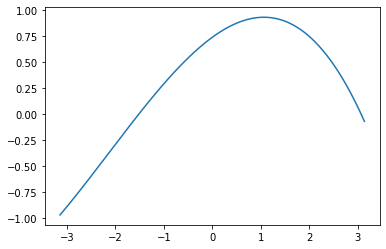

epoch(400) loss : 269.7891540527344


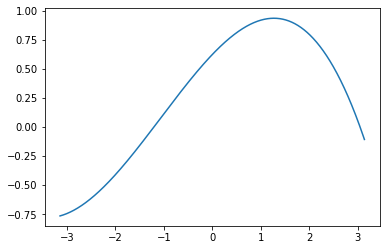

epoch(600) loss : 187.907958984375


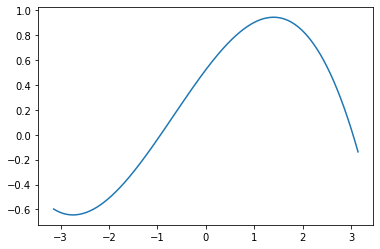

epoch(800) loss : 131.42355346679688


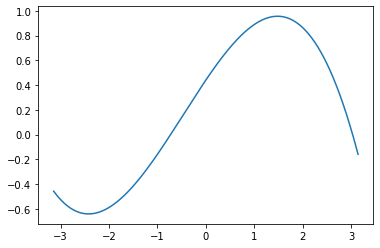

epoch(1000) loss : 92.41668701171875


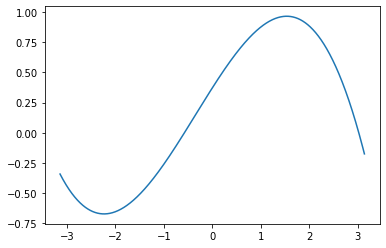

epoch(1200) loss : 65.45076751708984


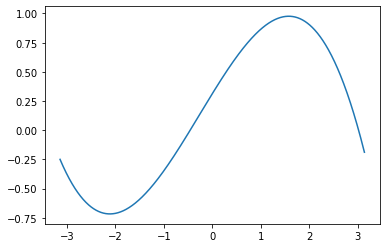

epoch(1400) loss : 46.78948974609375


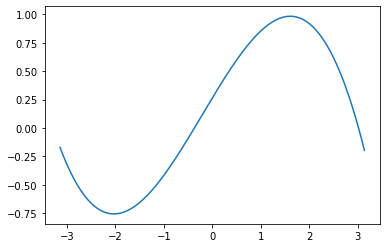

epoch(1600) loss : 33.86231994628906


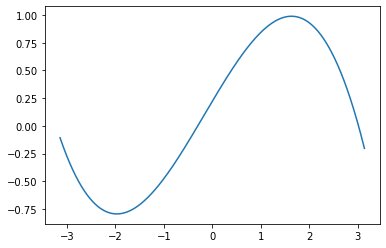

epoch(1800) loss : 24.898351669311523


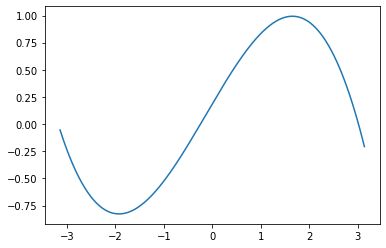

In [27]:
lr = 1e-6

for epoch in range(2000):
    # 랜덤하게 생성된 a, b, c, d 계수로 구성된 삼차함수 곡선
    y_pred = a * x**3 + b * x**2 + c * x + d
    
    # y = 실제값, y_pred = 예측값
    # 손실(오차) : y_pred - y => squared_error
    dist = y_pred - y
    loss = dist.pow(2).sum().item()
    
    if epoch % 200 == 0:
        print(f'epoch({epoch}) loss : {loss}')
        plt.plot(x, y_pred)
        plt.show()

    # 경사하강법 -> 새로운 가중치 업데이트
    # dist(y_pred - y) 미분
    grad_y_pred = 2.0 * dist
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    # a, b, c, d 계수 - 가중치를 반영
    # -= 빼고 그 값을 대입 / +=
    a -= lr * grad_a # 가중치를 업데이트 (기울기의 반대방향 * -1)
    b -= lr * grad_b
    c -= lr * grad_c
    d -= lr * grad_d


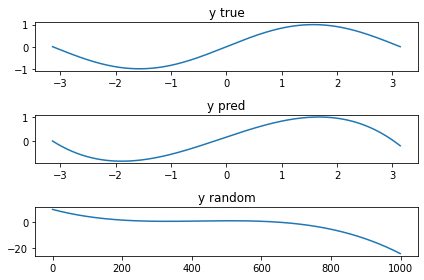

In [28]:
# 실제 사인 곡선
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 예측한 가중치의 사인 곡선
plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)

# 랜덤한 가중치의 사인 곡선
plt.subplot(3, 1, 3)
plt.title("y random")
plt.plot(y_random)

# 출력
plt.tight_layout()
plt.show()